In [7]:
import numpy as np

hidden_states = np.load('/home/poyu39/github/poyu39/emotion-conformer/t-sne/emotion2vec/hidden_states.npy', allow_pickle=True)
hidden_states_label = np.load('/home/poyu39/github/poyu39/emotion-conformer/t-sne/emotion2vec/hidden_states_label.npy', allow_pickle=True)
label_map = np.load('/home/poyu39/github/poyu39/emotion-conformer/dataset/IEMOCAP_full_release/label_map.npy', allow_pickle=True).item()
idx_to_label = {v: k for k, v in label_map.items()}

In [8]:
from sklearn.manifold import TSNE

hidden_states_avg = []
for i in range(len(hidden_states)):
    hidden_states_avg.append(np.mean(hidden_states[i], axis=0))
hidden_states_avg = np.array(hidden_states_avg)
tsne = TSNE(n_components=2, random_state=42, max_iter=10000, perplexity=30)
hidden_states_tsne = tsne.fit_transform(hidden_states_avg)

In [9]:
print("hidden_states_tsne shape:", hidden_states_tsne.shape)


hidden_states_tsne shape: (4490, 2)


/tmp/ipykernel_3966587/3495838579.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


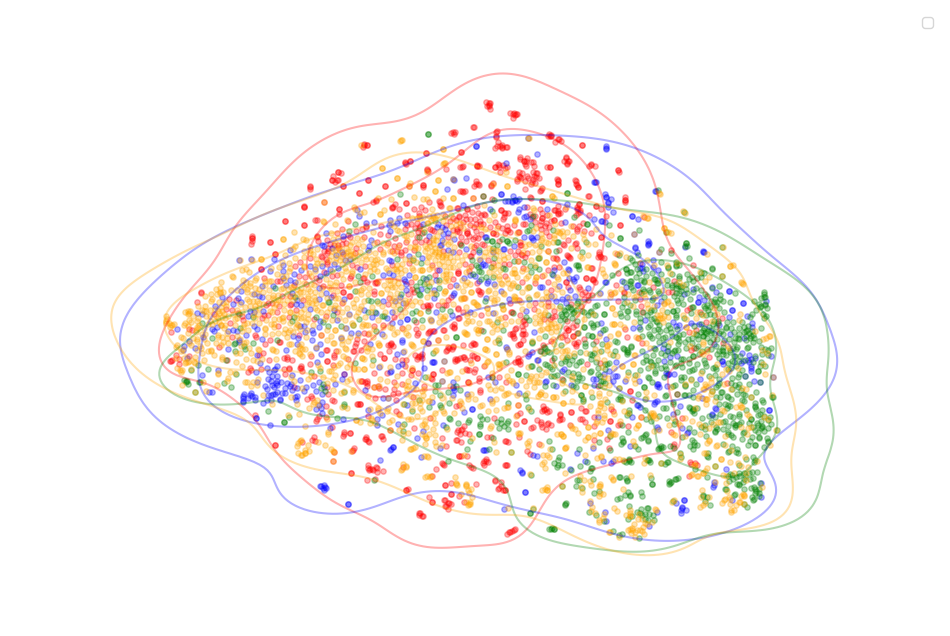

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

colors = ['red', 'blue', 'green', 'orange']
plt.figure(figsize=(12, 8))

for i, label in enumerate([0, 1, 2, 3]):
    mask = hidden_states_label == label
    x = hidden_states_tsne[mask, 0]
    y = hidden_states_tsne[mask, 1]
    
    plt.scatter(x, y, c=colors[i], alpha=0.3, s=15,
                # label=idx_to_label[label]
            )
    
    if len(x) > 10:
        sns.kdeplot(x=x, y=y, color=colors[i], alpha=0.3, levels=3)

plt.legend()
plt.axis('off')
plt.show()

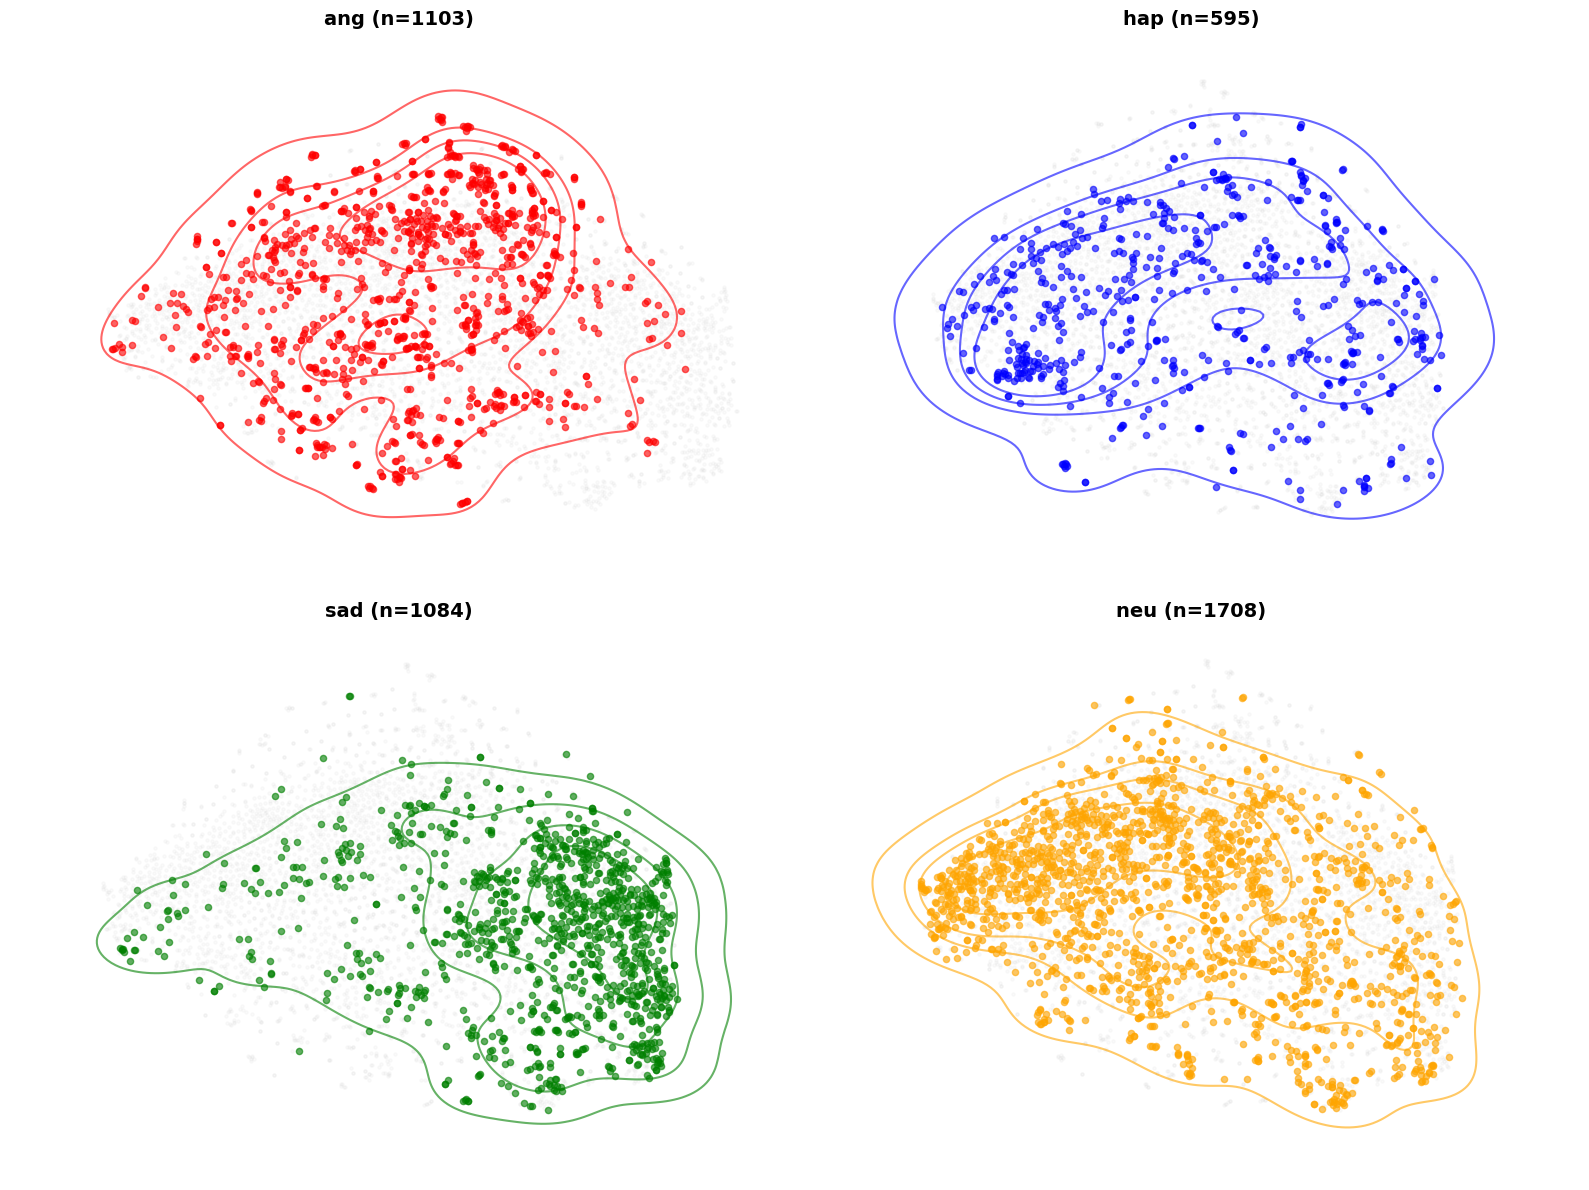

In [11]:
import seaborn as sns

colors = ['red', 'blue', 'green', 'orange']
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i, label in enumerate([0, 1, 2, 3]):
    mask = hidden_states_label == label
    x = hidden_states_tsne[mask, 0]
    y = hidden_states_tsne[mask, 1]
    
    ax = axes[i]
    
    ax.scatter(hidden_states_tsne[:, 0], hidden_states_tsne[:, 1], 
               c='lightgray', alpha=0.1, s=5)
    
    ax.scatter(x, y, c=colors[i], alpha=0.6, s=20, label=idx_to_label[label])
    
    if len(x) > 10:
        sns.kdeplot(x=x, y=y, color=colors[i], alpha=0.6, levels=5, ax=ax)
    
    ax.set_title(f'{idx_to_label[label]} (n={len(x)})', fontsize=14, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

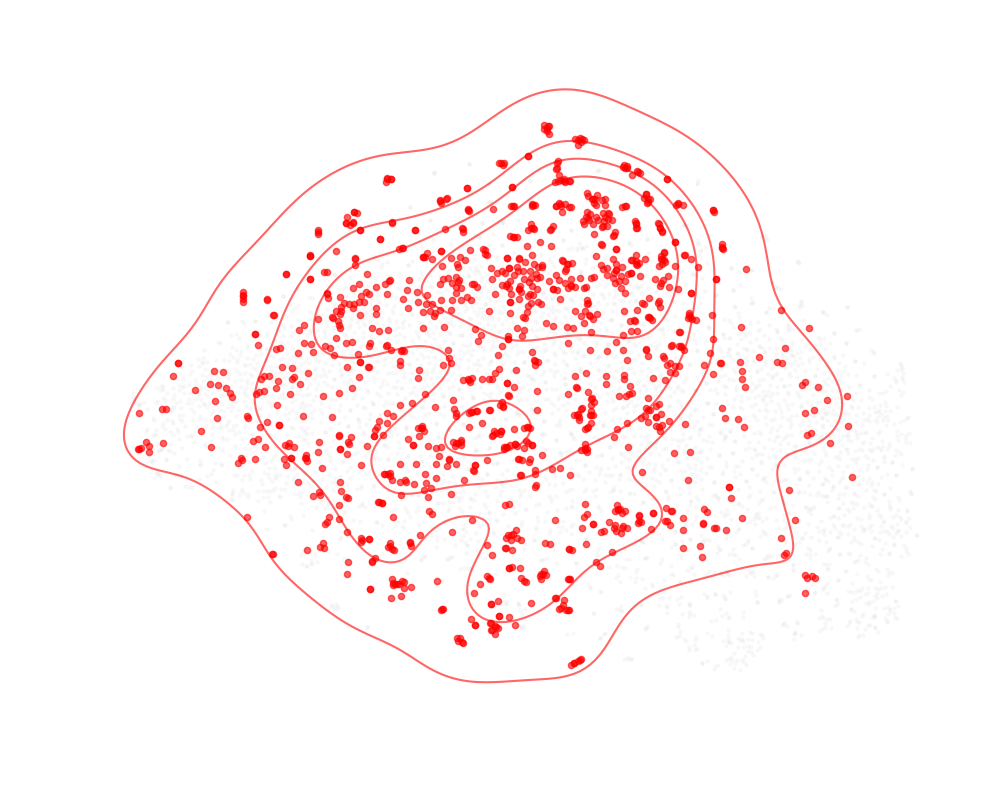

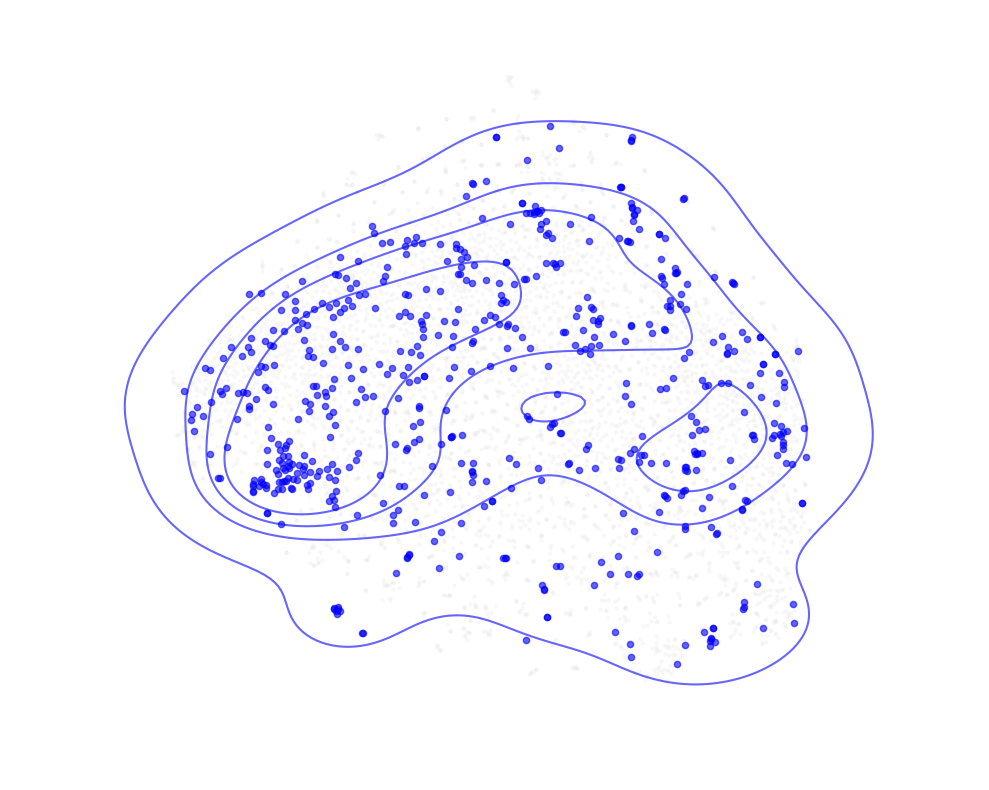

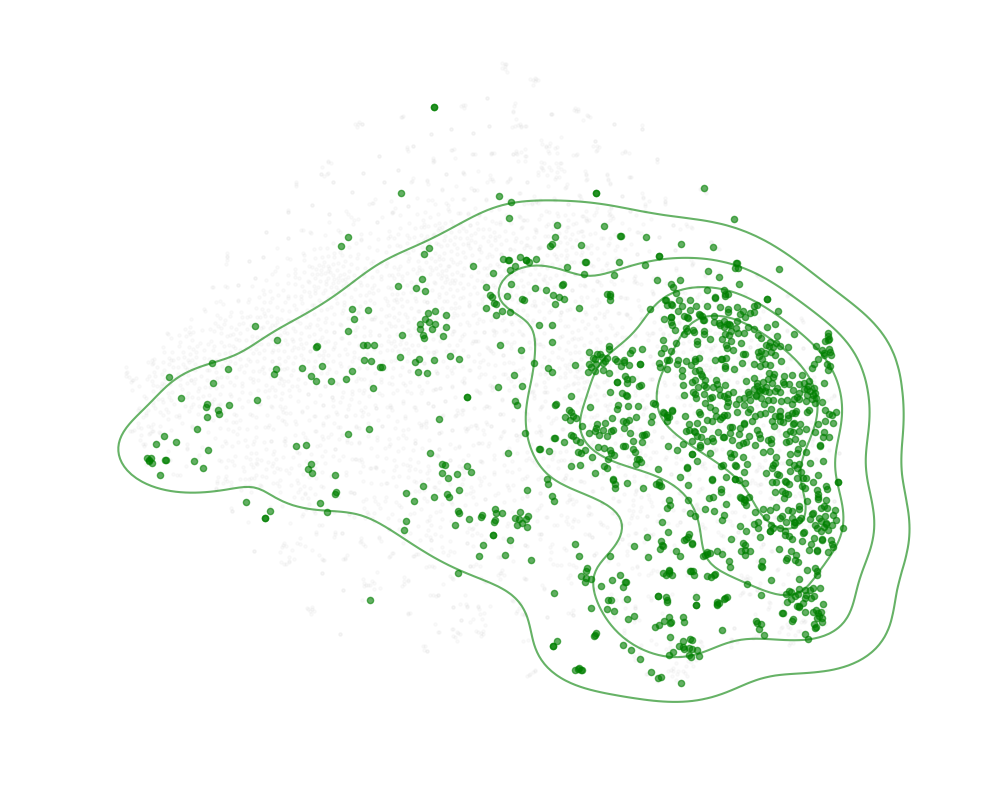

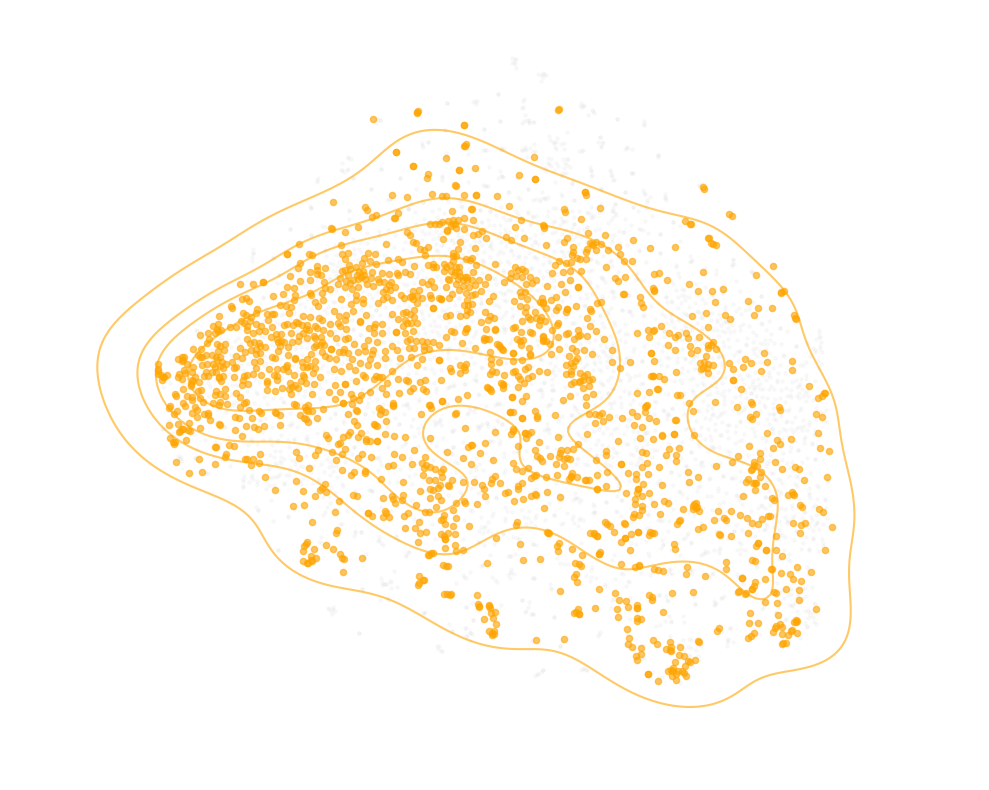

In [12]:
import seaborn as sns

colors = ['red', 'blue', 'green', 'orange']

for i, label in enumerate([0, 1, 2, 3]):
    mask = hidden_states_label == label
    x = hidden_states_tsne[mask, 0]
    y = hidden_states_tsne[mask, 1]
    
    plt.figure(figsize=(10, 8))
    
    plt.scatter(hidden_states_tsne[:, 0], hidden_states_tsne[:, 1],
               c='lightgray', alpha=0.1, s=5)
    
    plt.scatter(x, y, c=colors[i], alpha=0.6, s=20, label=idx_to_label[label])
    
    if len(x) > 10:
        sns.kdeplot(x=x, y=y, color=colors[i], alpha=0.6, levels=5)
    
    # plt.title(f'{idx_to_label[label]} (n={len(x)})', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()